<center> <h1>Analisis Pengaruh Indikator Makroekonomi dan Data Pasar Global terhadap Pergerakan Harga Bitcoin</h1>


This code is made by Rafael Hartono (166) and Nabil Putra Yuan (126)

# REQUEST YOUR FRED KEY HERE

FRED API
https://fredaccount.stlouisfed.org/apikeys

In [1]:
FRED_API_KEY = "CHANGE WITH YOUR API"

# DISCOVERING DATA
Collecting data from 3 different source and a bit cleaning NaN using ffill and bfill

## INSTALASI LIBRARY & PREPARATION

In [2]:
%pip install fredapi

In [ ]:
%pip install openpyxl

Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1331, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 935, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 999, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/commands/install.py", line 15, in <module>
    from pip._internal.cli.req_command import (
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/cli/req_command.py", line 18, in <module>
    from pip._internal.index.collector import LinkCollector
  File "/usr/local/lib/python3.12/dist-packages/pip/_internal/index/collector.py", line 31, in <module>
    from pip._vendor import requests
  File "/usr/local/lib/python3.12/dist-packages/pip/_vendor/requests/__init__.py", line 159, in <module>
^C


In [3]:
%pip install python-binance

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import requests
import os
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import time
import seaborn as sns
import matplotlib.pyplot as plt

import shutil

from fredapi import Fred
from binance.client import Client
from google.colab import drive

In [5]:
if not os.path.exists('data'):
    os.makedirs('data')

## FRED

In [6]:
today = datetime.now().strftime('%Y-%m-%d')
start='2018-01-01'
yesterday = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
end=yesterday
print(yesterday)

2025-11-24


In [7]:
D_date_range = pd.date_range(start, end, freq='D')
W_date_range = pd.date_range(start, end, freq='W')
M_date_range = pd.date_range(start, end, freq='M')
Q_date_range = pd.date_range(start, end, freq='Q')

In [8]:
fred = Fred(api_key=FRED_API_KEY)



df_fred_D = pd.DataFrame(index=D_date_range)
df_fred_W = pd.DataFrame(index=W_date_range)
df_fred_M = pd.DataFrame(index=M_date_range)
df_fred_M.index = pd.to_datetime(df_fred_M.index).to_period('M')
df_fred_Q = pd.DataFrame(index=Q_date_range)
df_fred_Q.index = pd.to_datetime(df_fred_Q.index).to_period('Q')


In [9]:


fred_daily_series = {
    'DTWEXBGS': 'Indeks_Dolar'
}


fred_month_series = {
    'FEDFUNDS': 'Suku_Bunga_AS',
    'CPIAUCSL': 'Inflasi_AS',
    'UNRATE': 'Pengangguran_AS',
    'PPIACO': 'PPI_AS',
    'RSXFS': 'Retail_Sales',
    'INDPRO': 'Industrial_Production',
    'HOUST': 'Housing_Starts',
    'M2SL': 'Money_Supply_M2'
}

fred_Q_series = {
    'GDP': 'GDP_AS'
}


for fred_code, col_name in fred_daily_series.items():
    try:
        print(f"{col_name}...", end=' ')
        data = fred.get_series(fred_code, observation_start=start,
                              observation_end=yesterday)
        data = data.fillna(method='ffill')
        if len(data) > 0:
            df_fred_D[col_name] = data
            df_fred_D[col_name] = df_fred_D[col_name].fillna(method='ffill')
            if pd.isnull(df_fred_D[col_name].iloc[0]):

              df_fred_D[col_name] = df_fred_D[col_name].fillna(method='bfill')
            print(f"{len(data)} data")
        else:
            print("kosong")
    except Exception as e:
        print("gagal")



for fred_code, col_name in fred_month_series.items():
    try:
        print(f"{col_name}...", end=' ')
        data = fred.get_series(fred_code, observation_start=start,
                              observation_end=yesterday)
        data.index=pd.to_datetime(data.index).to_period('M')

        if len(data) > 0:
            df_fred_M[col_name] = data
            print(f"{len(data)} data")
        else:
            print("kosong")
    except Exception as e:
        print("gagal")


for fred_code, col_name in fred_Q_series.items():
    try:
        print(f"{col_name}...", end=' ')
        data = fred.get_series(fred_code, observation_start=start,
                              observation_end=yesterday)
        data.index=pd.to_datetime(data.index).to_period('Q')
        if len(data) > 0:
            df_fred_Q[col_name] = data
            print(f"{len(data)} data")
        else:
            print("kosong")
    except Exception as e:
        print("gagal")

Indeks_Dolar... 2060 data
Suku_Bunga_AS... 94 data
Inflasi_AS... 93 data
Pengangguran_AS... 93 data
PPI_AS... 92 data
Retail_Sales... 92 data
Industrial_Production... 92 data
Housing_Starts... 92 data
Money_Supply_M2... 93 data
GDP_AS... 30 data


In [10]:
print("\n","="*5,"DAILY","="*5,"\n",df_fred_D)
print("\n","="*5,"MONTH","="*5,"\n",df_fred_M)
print("\n","="*5,"QUARTAL","="*5,"\n",df_fred_Q)


 ===== DAILY ===== 
             Indeks_Dolar
2018-01-01      109.6444
2018-01-02      109.6444
2018-01-03      109.6751
2018-01-04      109.4779
2018-01-05      109.3496
...                  ...
2025-11-20      122.0735
2025-11-21      122.2350
2025-11-22      122.2350
2025-11-23      122.2350
2025-11-24      122.2350

[2885 rows x 1 columns]

 ===== MONTH ===== 
          Suku_Bunga_AS  Inflasi_AS  Pengangguran_AS   PPI_AS  Retail_Sales  \
2018-01           1.41     248.859              4.0  197.900      423202.0   
2018-02           1.42     249.529              4.1  199.300      425507.0   
2018-03           1.51     249.577              4.0  199.300      425087.0   
2018-04           1.69     250.227              4.0  200.300      425899.0   
2018-05           1.70     250.792              3.8  203.200      432340.0   
...                ...         ...              ...      ...           ...   
2025-06           4.33     321.500              4.1  260.690      624146.0   
2025-07

## YAHOO FINANCE

In [11]:
df_yf = pd.DataFrame(index=D_date_range)

print("\n MENGAMBIL DATA DARI YAHOO FINANCE...")

yf_t = {
    'GC=F': 'Emas_USD',
    'SI=F': 'Perak_USD',
    'CL=F': 'Minyak_WTI',

    '^GSPC': 'SP500',
    '^DJI': 'Dow_Jones',
    '^IXIC': 'Nasdaq',


    'USDIDR=X': 'USD_IDR',

}


successful_downloads = 0
for ticker, name in yf_t.items():
    try:
        print(f" {name}...", end=' ')
        data = yf.download(ticker, start, end,
                          progress=False, auto_adjust=True, timeout=1000)
        if not data.empty:
            df_yf[name] = data['Close']
            df_yf[name] = df_yf[name].fillna(method='ffill')
            if pd.isnull(df_yf[name].iloc[0]):
              df_yf[name] = df_yf[name].fillna(method='bfill')
            print(f" {len(data)} data")
            successful_downloads += 1
        else:
            print(" kosong")
    except Exception as e:
        print(f" gagal")

print(f"\n Berhasil mengunduh {successful_downloads} dari {len(yf_t)} assets")




 MENGAMBIL DATA DARI YAHOO FINANCE...
 Emas_USD...  1987 data
 Perak_USD...  1987 data
 Minyak_WTI...  1988 data
 SP500...  1985 data
 Dow_Jones...  1985 data
 Nasdaq...  1985 data
 USD_IDR...  2056 data

 Berhasil mengunduh 7 dari 7 assets


In [12]:
print(df_yf.isnull().sum())
print('baris teratas',df_yf.head(1))
print('baris terakhir',df_yf.tail(1))

Emas_USD      0
Perak_USD     0
Minyak_WTI    0
SP500         0
Dow_Jones     0
Nasdaq        0
USD_IDR       0
dtype: int64
baris teratas                Emas_USD  Perak_USD  Minyak_WTI        SP500     Dow_Jones  \
2018-01-01  1313.699951     17.121   60.369999  2695.810059  24824.009766   

                 Nasdaq  USD_IDR  
2018-01-01  7006.899902  13542.0  
baris terakhir                Emas_USD  Perak_USD  Minyak_WTI        SP500     Dow_Jones  \
2025-11-24  4091.899902  50.294998       58.84  6602.990234  46245.410156   

                  Nasdaq  USD_IDR  
2025-11-24  22273.080078  16731.0  


## BINANCE

In [13]:

client = Client(tld='us')

DAFTAR_KOIN ={
        "BTCUSDT": "Bitcoin",
        "ETHUSDT": "Ethereum",
        "BNBUSDT": "BNB",
        "SOLUSDT": "Solana",
        "DOGEUSDT": "Dogecoin",
        "ADAUSDT": "Cardano",
        "XLMUSDT": "Stellar_Lumens",
    }

list_dataframe = []


print("Mulai mengambil data...")
for symbol, nama in DAFTAR_KOIN.items():
    try:
        print(f"Memproses {nama}...", end=" ")

        klines = client.get_historical_klines(symbol, "1d", "1 Jan, 2018")

        if klines:

            df = pd.DataFrame(klines).iloc[:, [0, 4]]
            df.columns = ["tanggal", nama]
            df["tanggal"] = pd.to_datetime(df["tanggal"], unit="ms")
            df[nama] = df[nama].astype(float)
            df.set_index("tanggal", inplace=True)

            list_dataframe.append(df)
            print(f"Berhasil diambil. tangggal awal {df.index.min().date()} hingga {df.index.max().date()}  (Harga Terakhir: ${df[nama].iloc[-1]:.2f})")
        else:
            print("Kosong.")

        time.sleep(0.5)

    except Exception as e:
        print(f"Error: {e}")



df_binance = pd.concat(list_dataframe, axis=1).sort_index()

print('baris teratas',df_binance.head(1))
print('baris terakhir',df_binance.tail(1))

Mulai mengambil data...
Memproses Bitcoin... Berhasil diambil. tangggal awal 2019-09-23 hingga 2025-11-25  (Harga Terakhir: $87952.74)
Memproses Ethereum... Berhasil diambil. tangggal awal 2019-09-23 hingga 2025-11-25  (Harga Terakhir: $2920.07)
Memproses BNB... Berhasil diambil. tangggal awal 2019-09-23 hingga 2025-11-25  (Harga Terakhir: $863.81)
Memproses Solana... Berhasil diambil. tangggal awal 2020-09-18 hingga 2025-11-25  (Harga Terakhir: $137.79)
Memproses Dogecoin... Berhasil diambil. tangggal awal 2019-10-25 hingga 2025-11-25  (Harga Terakhir: $0.15)
Memproses Cardano... Berhasil diambil. tangggal awal 2019-09-25 hingga 2025-11-25  (Harga Terakhir: $0.42)
Memproses Stellar_Lumens... Berhasil diambil. tangggal awal 2019-09-25 hingga 2025-11-25  (Harga Terakhir: $0.25)
baris teratas             Bitcoin  Ethereum      BNB  Solana  Dogecoin  Cardano  \
tanggal                                                             
2019-09-23  9930.13    209.55  19.8787     NaN       NaN    

# STRUCTURING DATA

In [14]:
df_daily_merge=pd.concat([df_fred_D,df_yf,df_binance],axis=1)
print("1 Tanggal teratas",df_daily_merge.head(1))
print("1 Tanggal terakhir",df_daily_merge.tail(1))

1 Tanggal teratas             Indeks_Dolar     Emas_USD  Perak_USD  Minyak_WTI        SP500  \
2018-01-01      109.6444  1313.699951     17.121   60.369999  2695.810059   

               Dow_Jones       Nasdaq  USD_IDR  Bitcoin  Ethereum  BNB  \
2018-01-01  24824.009766  7006.899902  13542.0      NaN       NaN  NaN   

            Solana  Dogecoin  Cardano  Stellar_Lumens  
2018-01-01     NaN       NaN      NaN             NaN  
1 Tanggal terakhir             Indeks_Dolar  Emas_USD  Perak_USD  Minyak_WTI  SP500  Dow_Jones  \
2025-11-25           NaN       NaN        NaN         NaN    NaN        NaN   

            Nasdaq  USD_IDR   Bitcoin  Ethereum     BNB  Solana  Dogecoin  \
2025-11-25     NaN      NaN  87952.74   2920.07  863.81  137.79   0.15109   

            Cardano  Stellar_Lumens  
2025-11-25   0.4249          0.2524  


In [15]:
df_yf_to_month = df_yf.resample('M').mean()
df_yf_to_month.index = df_yf_to_month.index.to_period('M')
df_yf_to_month.head(1)

,Emas_USD,Perak_USD,Minyak_WTI,SP500,Dow_Jones,Nasdaq,USD_IDR
2018-01,1331.82581,17.126323,63.613226,2790.098397,25809.243637,7277.966419,13378.419355


In [16]:
df_binance_to_month = df_binance.resample('M').mean()
df_binance_to_month.index = df_binance_to_month.index.to_period('M')
df_binance_to_month.head(1)

,Bitcoin,Ethereum,BNB,Solana,Dogecoin,Cardano,Stellar_Lumens
tanggal,,,,,,,
2019-09,8459.47,176.245,16.172875,NaN,NaN,0.03845,0.058513


In [17]:
df_fred_D_to_M = df_fred_D.resample('M').mean()
df_fred_D_to_M.index = df_fred_D_to_M.index.to_period('M')

df_fred_M1=pd.concat([df_fred_M,df_fred_D_to_M],axis=1)
df_fred_M1.head(1)

,Suku_Bunga_AS,Inflasi_AS,Pengangguran_AS,PPI_AS,Retail_Sales,Industrial_Production,Housing_Starts,Money_Supply_M2,Indeks_Dolar
2018-01,1.41,248.859,4.0,197.9,423202.0,101.4625,1299.0,13882.9,108.380987


In [18]:
df_month_merge=pd.concat([df_fred_M1,df_yf_to_month,df_binance_to_month],axis=1)
df_month_merge.shape

(95, 23)

In [19]:
df_yf_to_Q = df_yf.resample('Q').mean()
df_yf_to_Q.index = df_yf_to_Q.index.to_period('Q')
df_yf_to_Q.shape

(32, 7)

In [20]:
df_binance_to_Q = df_binance.resample('Q').mean()
df_binance_to_Q.index = df_binance_to_Q.index.to_period('Q')
df_binance_to_Q.shape

(26, 7)

In [21]:

df_fred_D_to_Q = df_fred_D.resample('Q').mean()
df_fred_D_to_Q.index = df_fred_D_to_Q.index.to_period('Q')

df_fred_Q1=pd.concat([df_fred_Q,df_fred_D_to_Q],axis=1)


df_fred_M_to_Q = df_fred_M.resample('Q').mean()


df_fred_Q_gabungan = pd.concat([df_fred_Q1, df_fred_M_to_Q], axis=1)

print(df_fred_Q_gabungan.shape)

(32, 10)


In [22]:
df_Q_merge=pd.concat([df_fred_Q_gabungan,df_yf_to_Q,df_binance_to_Q],axis=1)
print(df_Q_merge.shape)

(32, 24)


# VISUALIZATION

## CORRELATION MATRIX

In [23]:
df_daily_clean= df_daily_merge.dropna()
df_daily_change = df_daily_clean.pct_change().dropna()

print("=== DATA PERUBAHAN HARIAN ===")
print(f"Shape: {df_daily_change.shape}")
print(f"Periode: {df_daily_change.index.min()} to {df_daily_change.index.max()}")
print(f"Total days: {len(df_daily_change)}")

print("\n5 Data perubahan teratas:")
print(df_daily_change.head())
print("\n5 Data perubahan terakhir:")
print(df_daily_change.tail())

print("\nStatistik perubahan:")
print(df_daily_change.describe())

=== DATA PERUBAHAN HARIAN ===
Shape: (1893, 15)
Periode: 2020-09-19 00:00:00 to 2025-11-24 00:00:00
Total days: 1893

5 Data perubahan teratas:
            Indeks_Dolar  Emas_USD  Perak_USD  Minyak_WTI     SP500  \
2020-09-19      0.000000  0.000000   0.000000    0.000000  0.000000   
2020-09-20      0.000000  0.000000   0.000000    0.000000  0.000000   
2020-09-21      0.009886 -0.026074  -0.100969   -0.043785 -0.011571   
2020-09-22      0.001423 -0.001368   0.005885    0.007377  0.010518   
2020-09-23      0.006093 -0.020383  -0.058424    0.008333 -0.023721   

            Dow_Jones    Nasdaq   USD_IDR   Bitcoin  Ethereum       BNB  \
2020-09-19   0.000000  0.000000  0.000000  0.013309  0.005425 -0.018477   
2020-09-20   0.000000  0.000000  0.000000 -0.015034 -0.037456 -0.030305   
2020-09-21  -0.018430 -0.001342 -0.004057 -0.044243 -0.083729 -0.124755   
2020-09-22   0.005175  0.017148  0.007550  0.008649  0.011647  0.043097   
2020-09-23  -0.019241 -0.030159 -0.006511 -0.027487 -0

=== CORRELATION MATRIX LENGKAP ===
Shape: (15, 15)

Matriks Korelasi:
                Indeks_Dolar  Emas_USD  Perak_USD  Minyak_WTI  SP500  \
Indeks_Dolar           1.000    -0.433     -0.433      -0.117 -0.273   
Emas_USD              -0.433     1.000      0.760       0.134  0.077   
Perak_USD             -0.433     0.760      1.000       0.189  0.206   
Minyak_WTI            -0.117     0.134      0.189       1.000  0.164   
SP500                 -0.273     0.077      0.206       0.164  1.000   
Dow_Jones             -0.264     0.055      0.180       0.179  0.920   
Nasdaq                -0.249     0.073      0.196       0.105  0.951   
USD_IDR                0.063    -0.004     -0.043       0.009  0.011   
Bitcoin               -0.162     0.059      0.125       0.062  0.337   
Ethereum              -0.165     0.059      0.134       0.075  0.344   
BNB                   -0.142     0.052      0.109       0.060  0.238   
Solana                -0.131     0.043      0.101       0.048  0.2

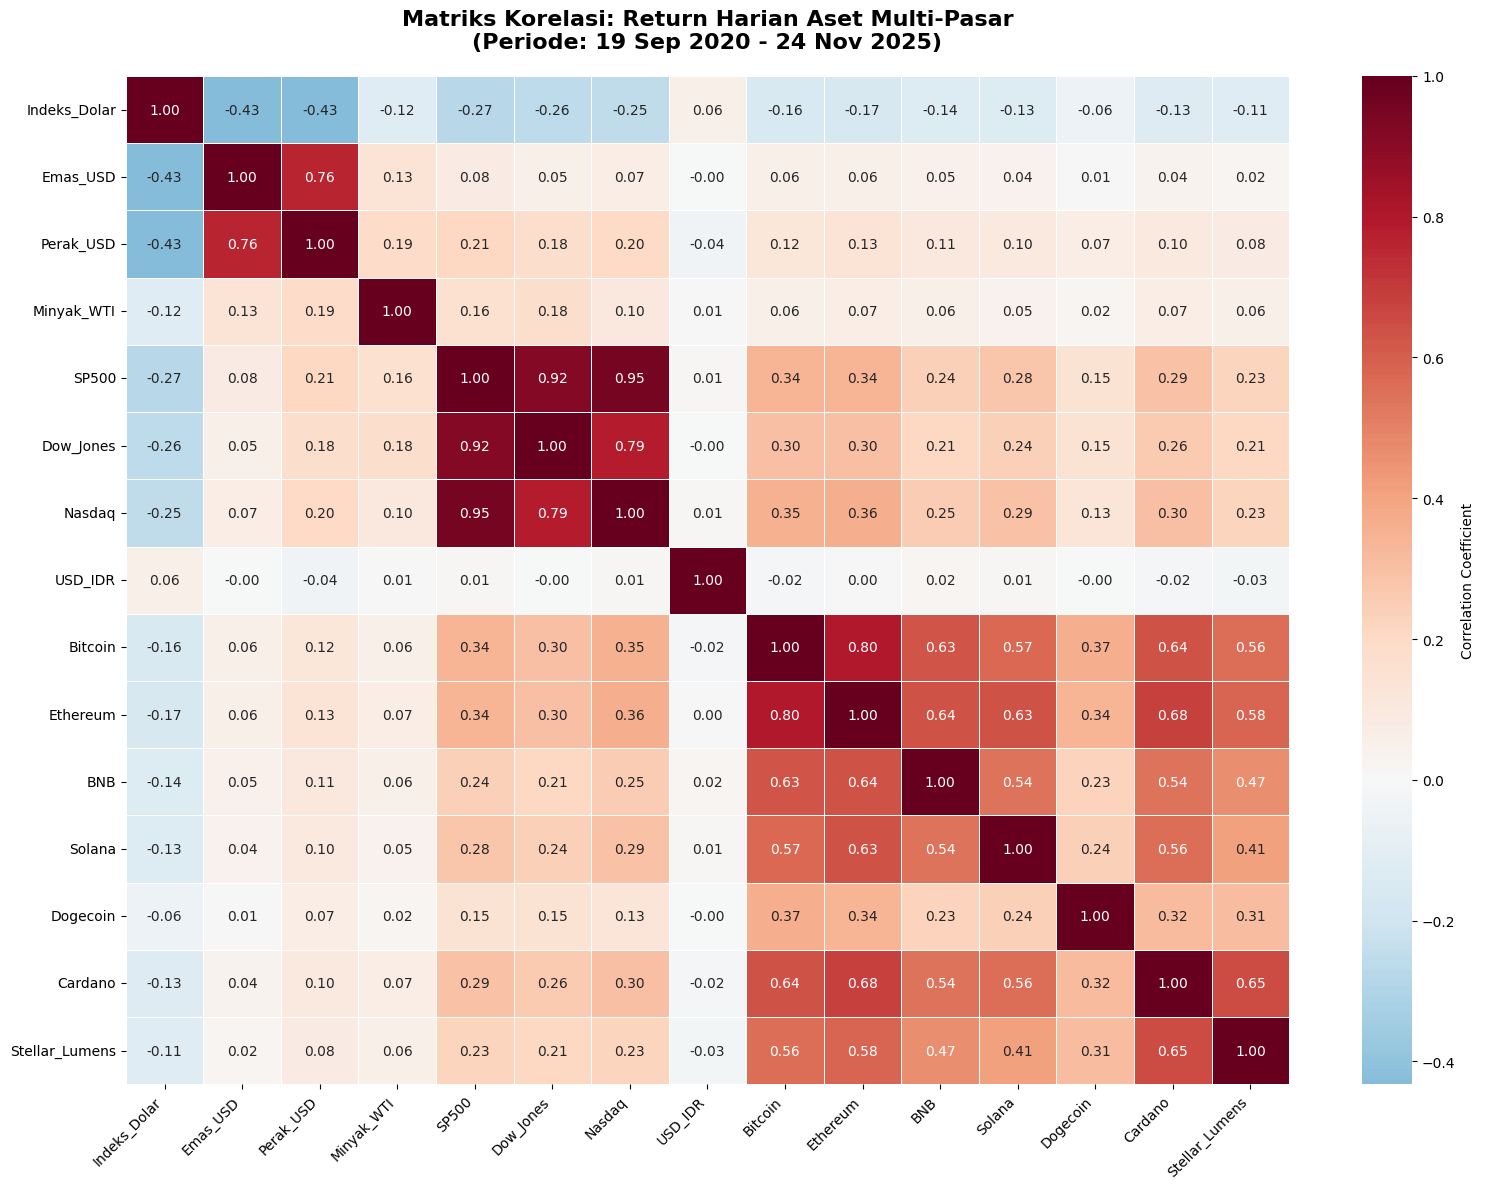

=== CORRELATION MATRIX RETURN HARIAN MASKED ===


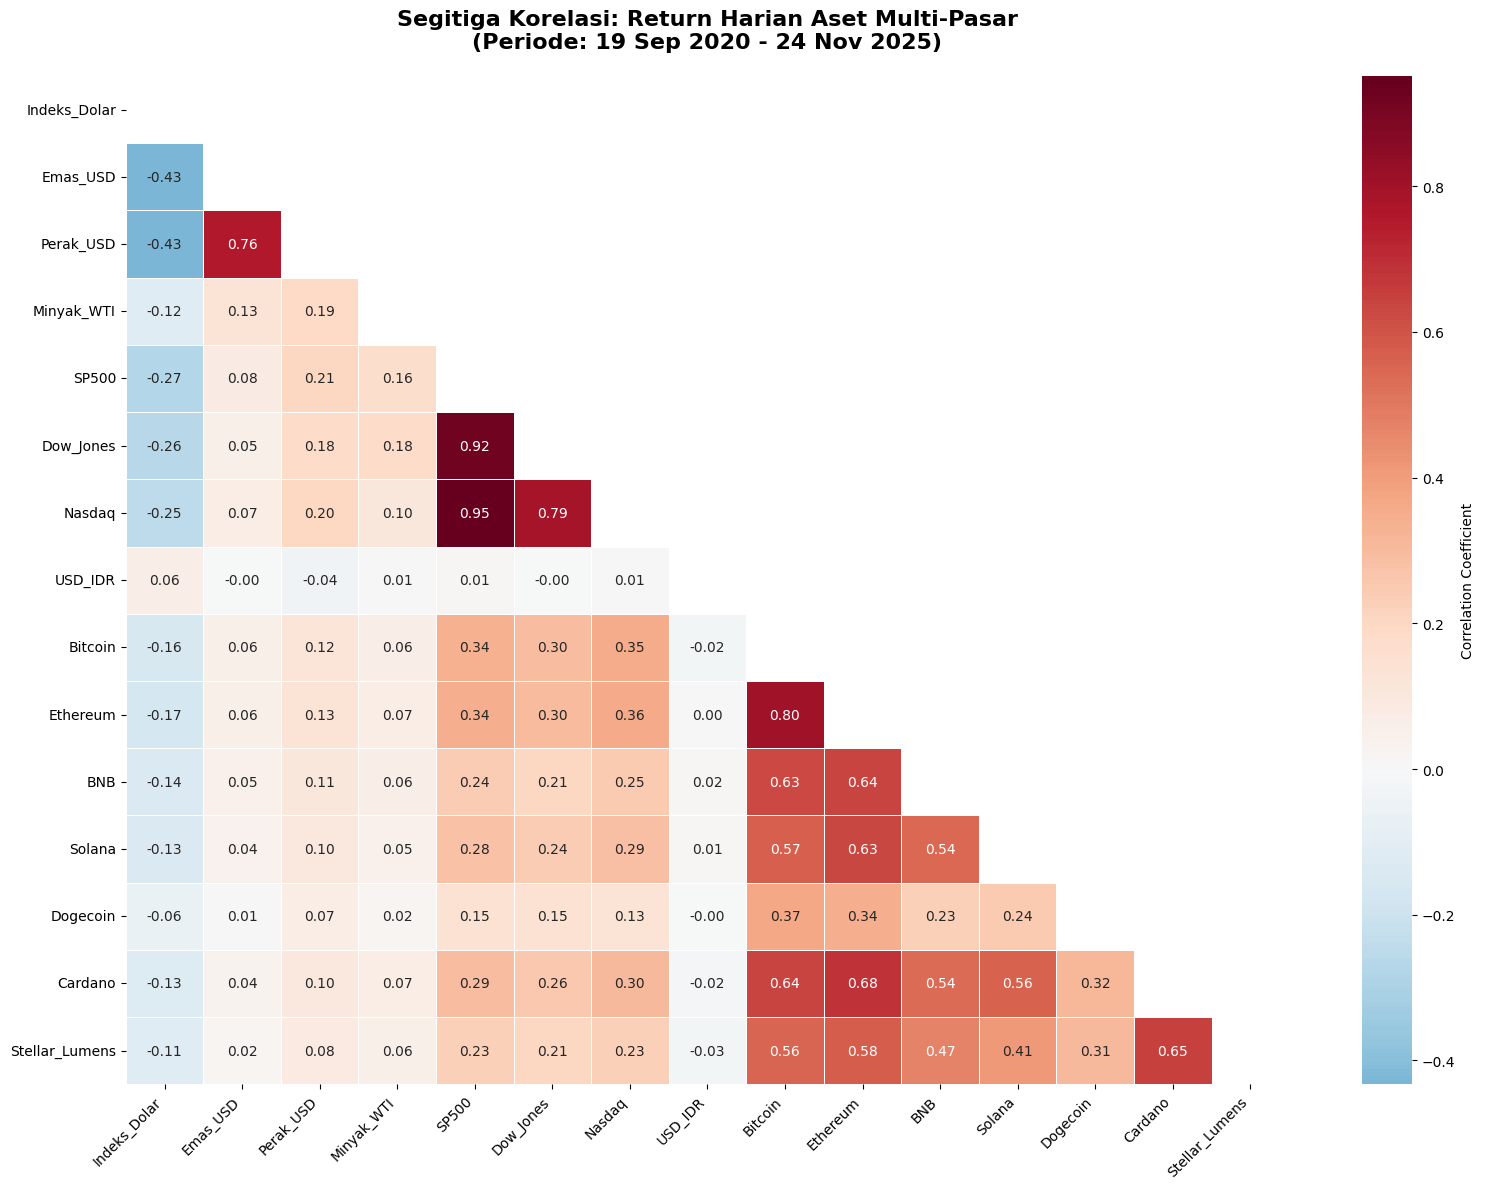

In [24]:
correlation_matrix = df_daily_change.corr()

print("=== CORRELATION MATRIX LENGKAP ===")
print(f"Shape: {correlation_matrix.shape}")
print("\nMatriks Korelasi:")
print(correlation_matrix.round(3))


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Matriks Korelasi: Return Harian Aset Multi-Pasar\n(Periode: 19 Sep 2020 - 24 Nov 2025)',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_daily.png')
plt.show()

print("=== CORRELATION MATRIX RETURN HARIAN MASKED ===")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            mask=mask,
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Segitiga Korelasi: Return Harian Aset Multi-Pasar\n(Periode: 19 Sep 2020 - 24 Nov 2025)',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
df_month_clean= df_month_merge.dropna()
df_month_change = df_month_clean.pct_change().dropna()

print("=== DATA PERUBAHAN BULANAN ===")
print(f"Shape: {df_month_change.shape}")
print(f"Periode: {df_month_change.index.min()} to {df_month_change.index.max()}")
print(f"Total month: {len(df_month_change)}")

print("\n5 Data perubahan teratas:")
print(df_month_change.head())
print("\n5 Data perubahan terakhir:")
print(df_month_change.tail())

print("\nStatistik perubahan:")
print(df_month_change.describe())

=== DATA PERUBAHAN BULANAN ===
Shape: (59, 23)
Periode: 2020-10 to 2025-08
Total month: 59

5 Data perubahan teratas:
         Suku_Bunga_AS  Inflasi_AS  Pengangguran_AS    PPI_AS  Retail_Sales  \
2020-10       0.000000    0.001238        -0.115385  0.005115     -0.004017   
2020-11       0.000000    0.002274        -0.028986  0.009160     -0.005583   
2020-12       0.000000    0.004346         0.000000  0.011094      0.016462   
2021-01       0.000000    0.002267        -0.044776  0.021446      0.032215   
2021-02      -0.111111    0.003556        -0.031250  0.028320     -0.025516   

         Industrial_Production  Housing_Starts  Money_Supply_M2  Indeks_Dolar  \
2020-10               0.008050        0.047522         0.008319     -0.004912   
2020-11               0.003537        0.000000         0.012149     -0.015134   
2020-12               0.013199        0.046014         0.008120     -0.018467   
2021-01               0.005278        0.009913         0.011838     -0.003609   
20

=== CORRELATION MATRIX LENGKAP ===
Shape: (23, 23)

Matriks Korelasi:
                       Suku_Bunga_AS  Inflasi_AS  Pengangguran_AS  PPI_AS  \
Suku_Bunga_AS                  1.000       0.451           -0.008   0.263   
Inflasi_AS                     0.451       1.000           -0.193   0.682   
Pengangguran_AS               -0.008      -0.193            1.000  -0.196   
PPI_AS                         0.263       0.682           -0.196   1.000   
Retail_Sales                  -0.016       0.221            0.128   0.288   
Industrial_Production          0.020       0.166           -0.065   0.151   
Housing_Starts                -0.159      -0.011            0.033   0.016   
Money_Supply_M2               -0.280       0.165           -0.295   0.458   
Indeks_Dolar                   0.277       0.240            0.069   0.093   
Emas_USD                      -0.124      -0.095            0.064  -0.052   
Perak_USD                     -0.131      -0.086            0.088   0.033   
Minyak

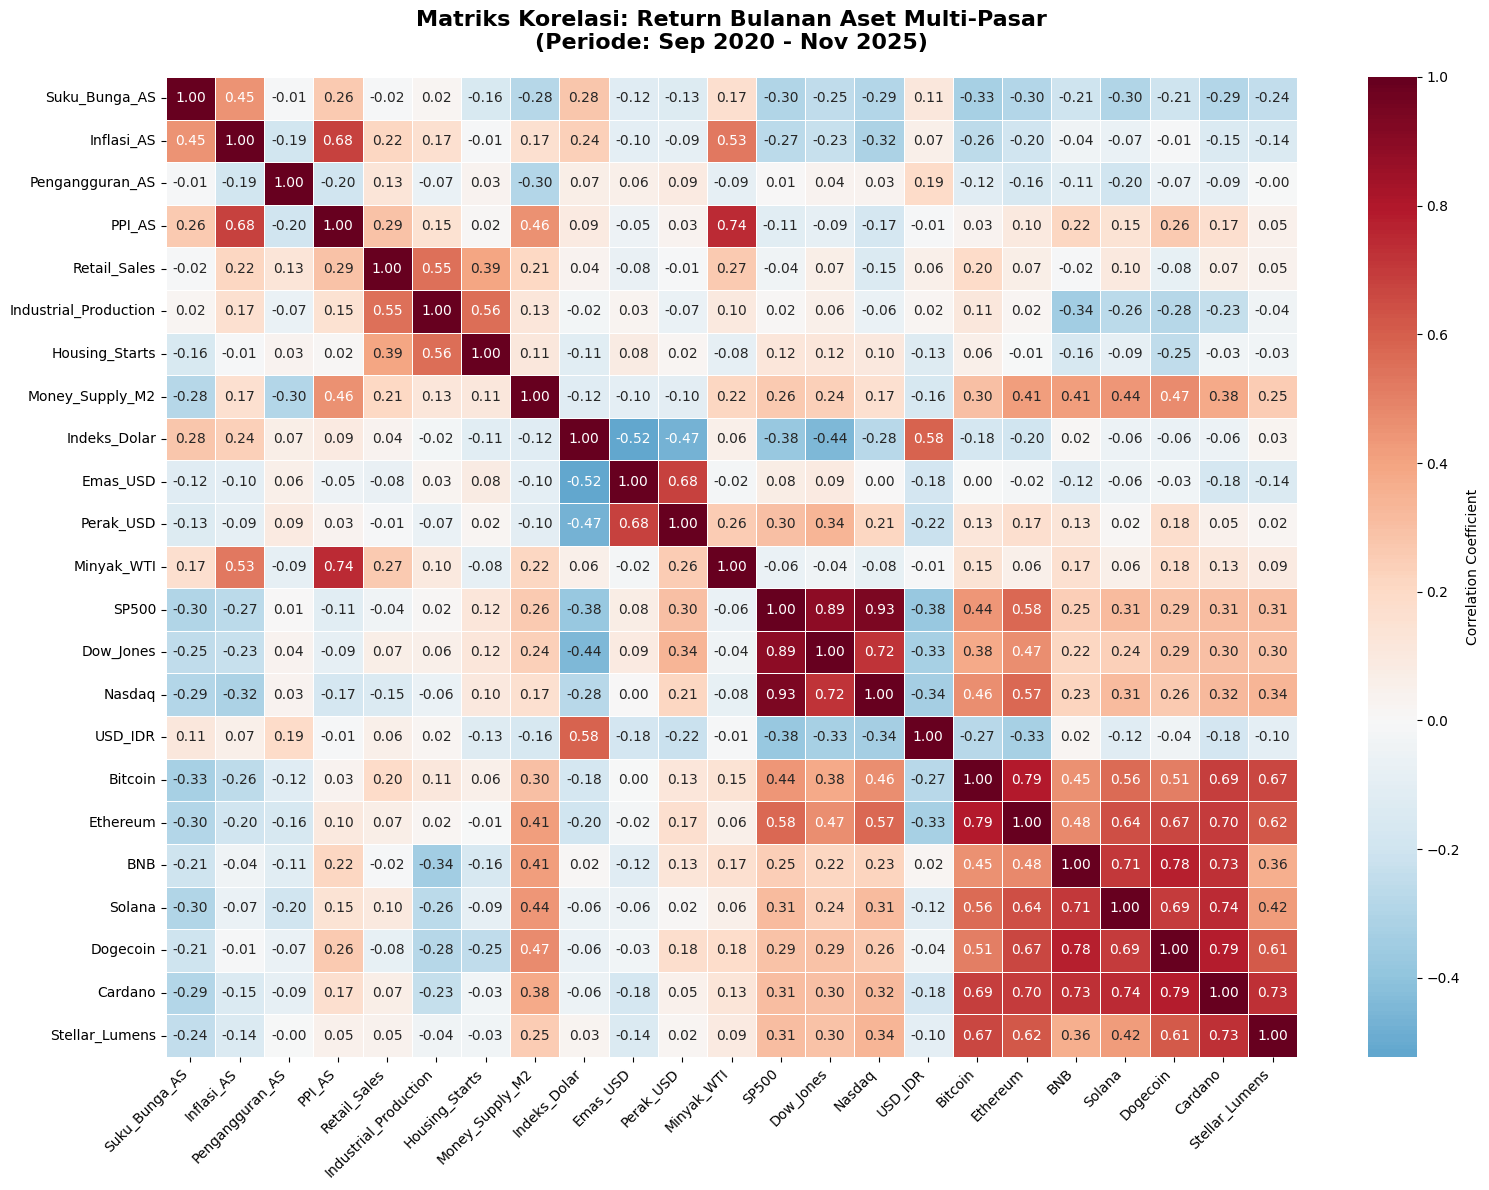

=== CORRELATION MATRIX RETURN BULANAN MASKED ===


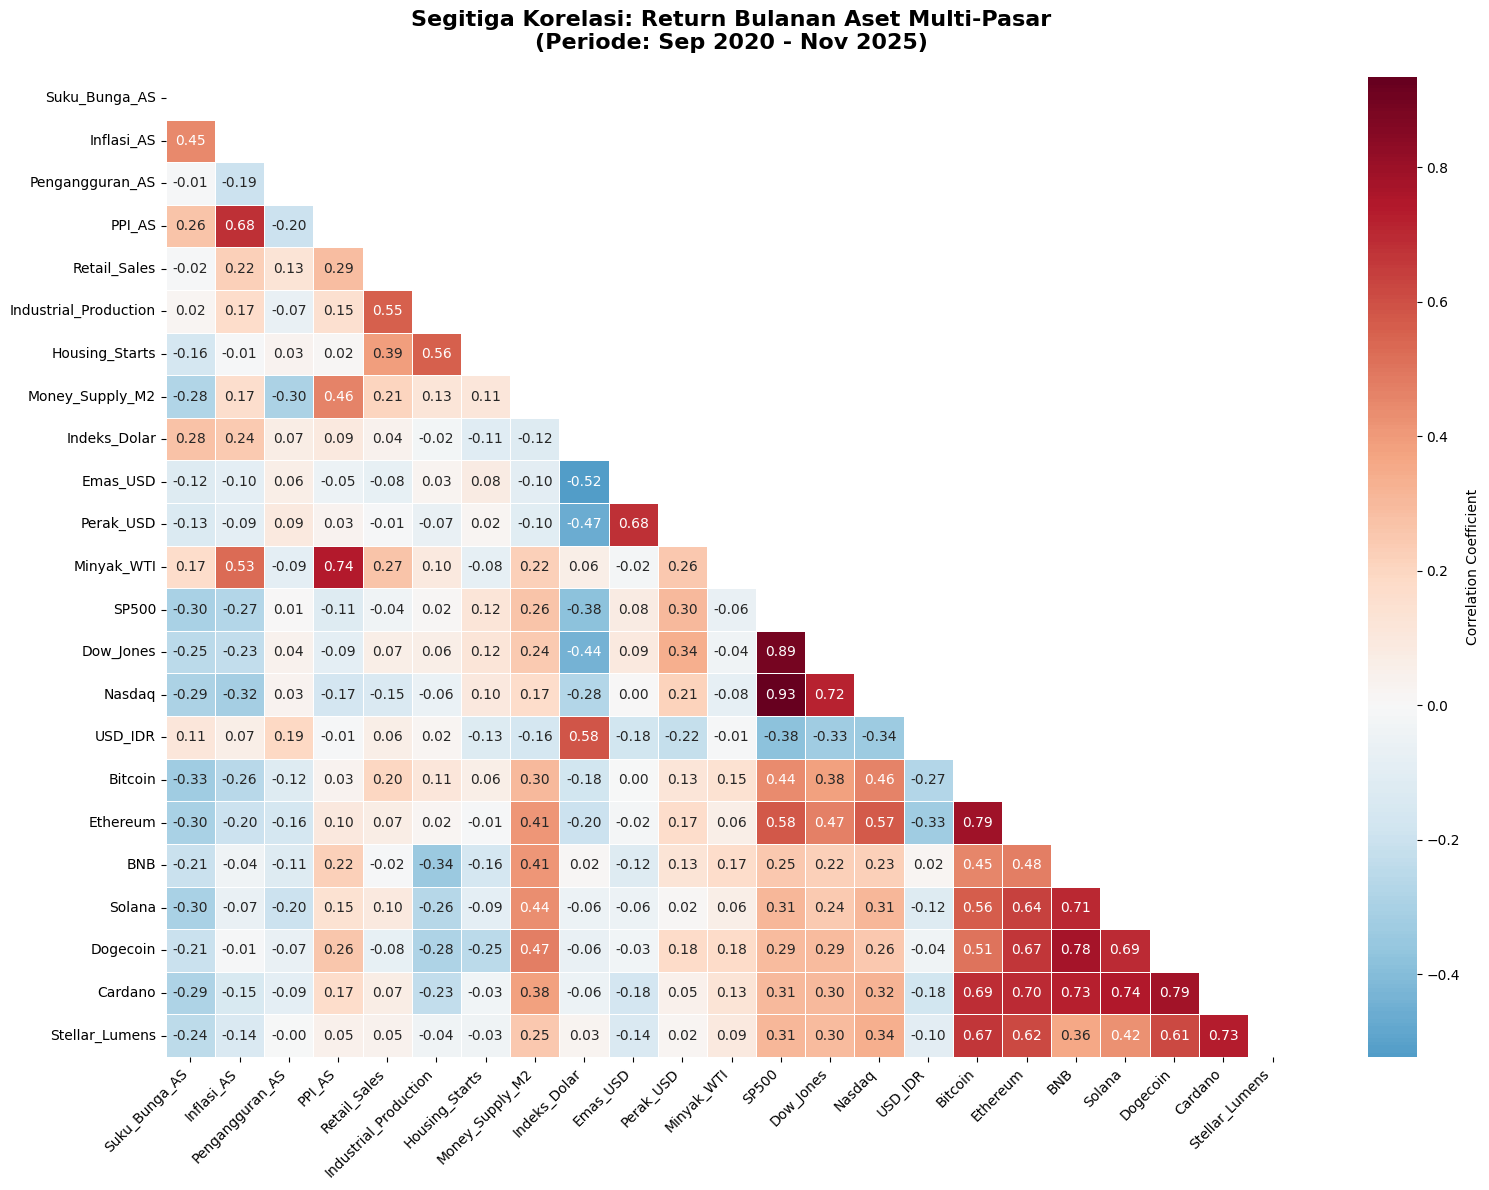

In [26]:

correlation_matrix = df_month_change.corr()

print("=== CORRELATION MATRIX LENGKAP ===")
print(f"Shape: {correlation_matrix.shape}")
print("\nMatriks Korelasi:")
print(correlation_matrix.round(3))


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Matriks Korelasi: Return Bulanan Aset Multi-Pasar\n(Periode: Sep 2020 - Nov 2025)',
          fontsize=16, fontweight='bold', pad=20)


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_monthly.png')
plt.show()

print("=== CORRELATION MATRIX RETURN BULANAN MASKED ===")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            mask=mask,
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Segitiga Korelasi: Return Bulanan Aset Multi-Pasar\n(Periode: Sep 2020 - Nov 2025)',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [27]:
df_Q_clean= df_Q_merge.dropna()
df_Q_change = df_Q_clean.pct_change().dropna()

print("=== DATA PERUBAHAN KUARTAL ===")
print(f"Shape: {df_Q_change.shape}")
print(f"Periode: {df_Q_change.index.min()} to {df_Q_change.index.max()}")
print(f"Total kuartal: {len(df_Q_change)}")

print("\n5 Data perubahan teratas:")
print(df_Q_change.head())
print("\n5 Data perubahan terakhir:")
print(df_Q_change.tail())

print("\nStatistik perubahan:")
print(df_Q_change.describe())

=== DATA PERUBAHAN KUARTAL ===
Shape: (19, 24)
Periode: 2020Q4 to 2025Q2
Total kuartal: 19

5 Data perubahan teratas:
          GDP_AS  Indeks_Dolar  Suku_Bunga_AS  Inflasi_AS  Pengangguran_AS  \
2020Q4  0.017633     -0.029822      -0.035714    0.007214        -0.231061   
2021Q1  0.026872     -0.013941      -0.111111    0.009938        -0.078818   
2021Q2  0.032857     -0.004119      -0.125000    0.018557        -0.048128   
2021Q3  0.023754      0.012762       0.285714    0.016035        -0.146067   
2021Q4  0.034660      0.015161      -0.111111    0.021375        -0.171053   

          PPI_AS  Retail_Sales  Industrial_Production  Housing_Starts  \
2020Q4  0.021448      0.011566               0.018249        0.069397   
2021Q1  0.058962      0.058988               0.002391        0.006383   
2021Q2  0.065514      0.058120               0.016758        0.000846   
2021Q3  0.043536     -0.013102               0.004576        0.007182   
2021Q4  0.034449      0.028786               0.0

=== CORRELATION MATRIX LENGKAP ===
Shape: (24, 24)

Matriks Korelasi:
                       GDP_AS  Indeks_Dolar  Suku_Bunga_AS  Inflasi_AS  \
GDP_AS                  1.000         0.052          0.173       0.679   
Indeks_Dolar            0.052         1.000          0.429       0.404   
Suku_Bunga_AS           0.173         0.429          1.000       0.532   
Inflasi_AS              0.679         0.404          0.532       1.000   
Pengangguran_AS        -0.552         0.109         -0.037      -0.497   
PPI_AS                  0.671         0.074          0.367       0.716   
Retail_Sales            0.627        -0.132          0.037       0.417   
Industrial_Production   0.464        -0.230         -0.043       0.294   
Housing_Starts          0.010        -0.256         -0.419      -0.019   
Money_Supply_M2         0.573        -0.187         -0.255       0.294   
Emas_USD               -0.495        -0.356         -0.283      -0.406   
Perak_USD              -0.286        -0.28

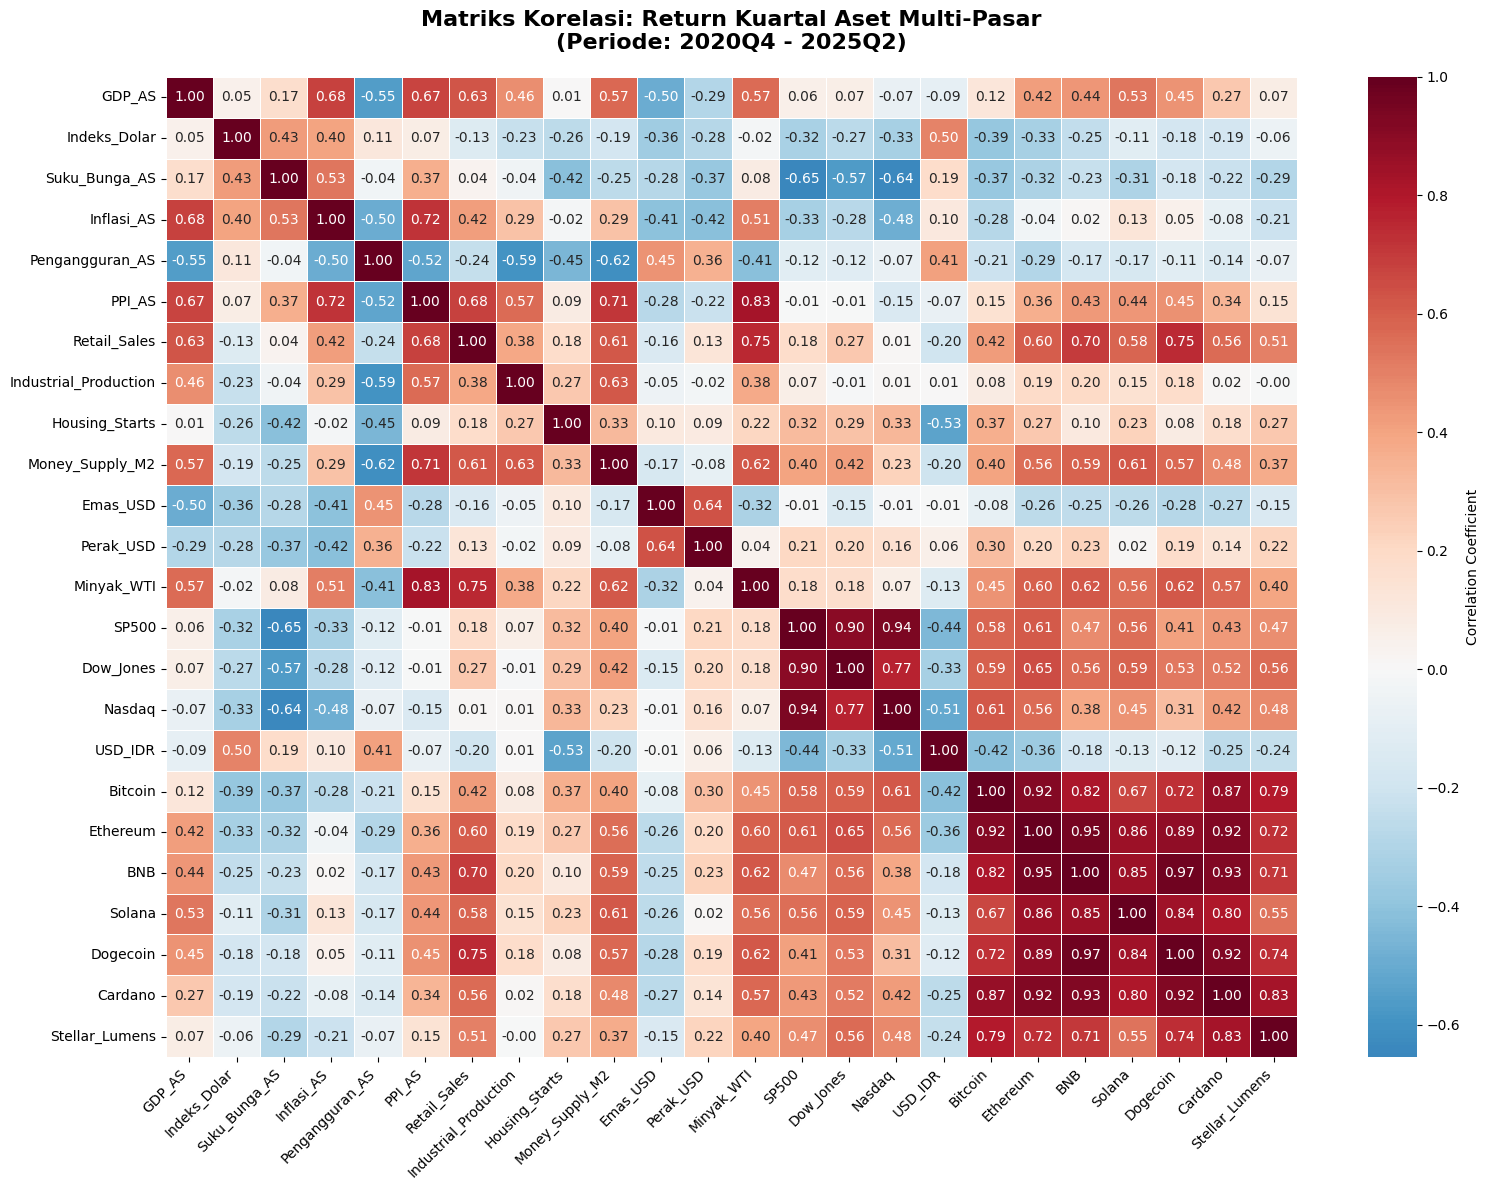

=== CORRELATION MATRIX RETURN KUARTAL MASKED ===


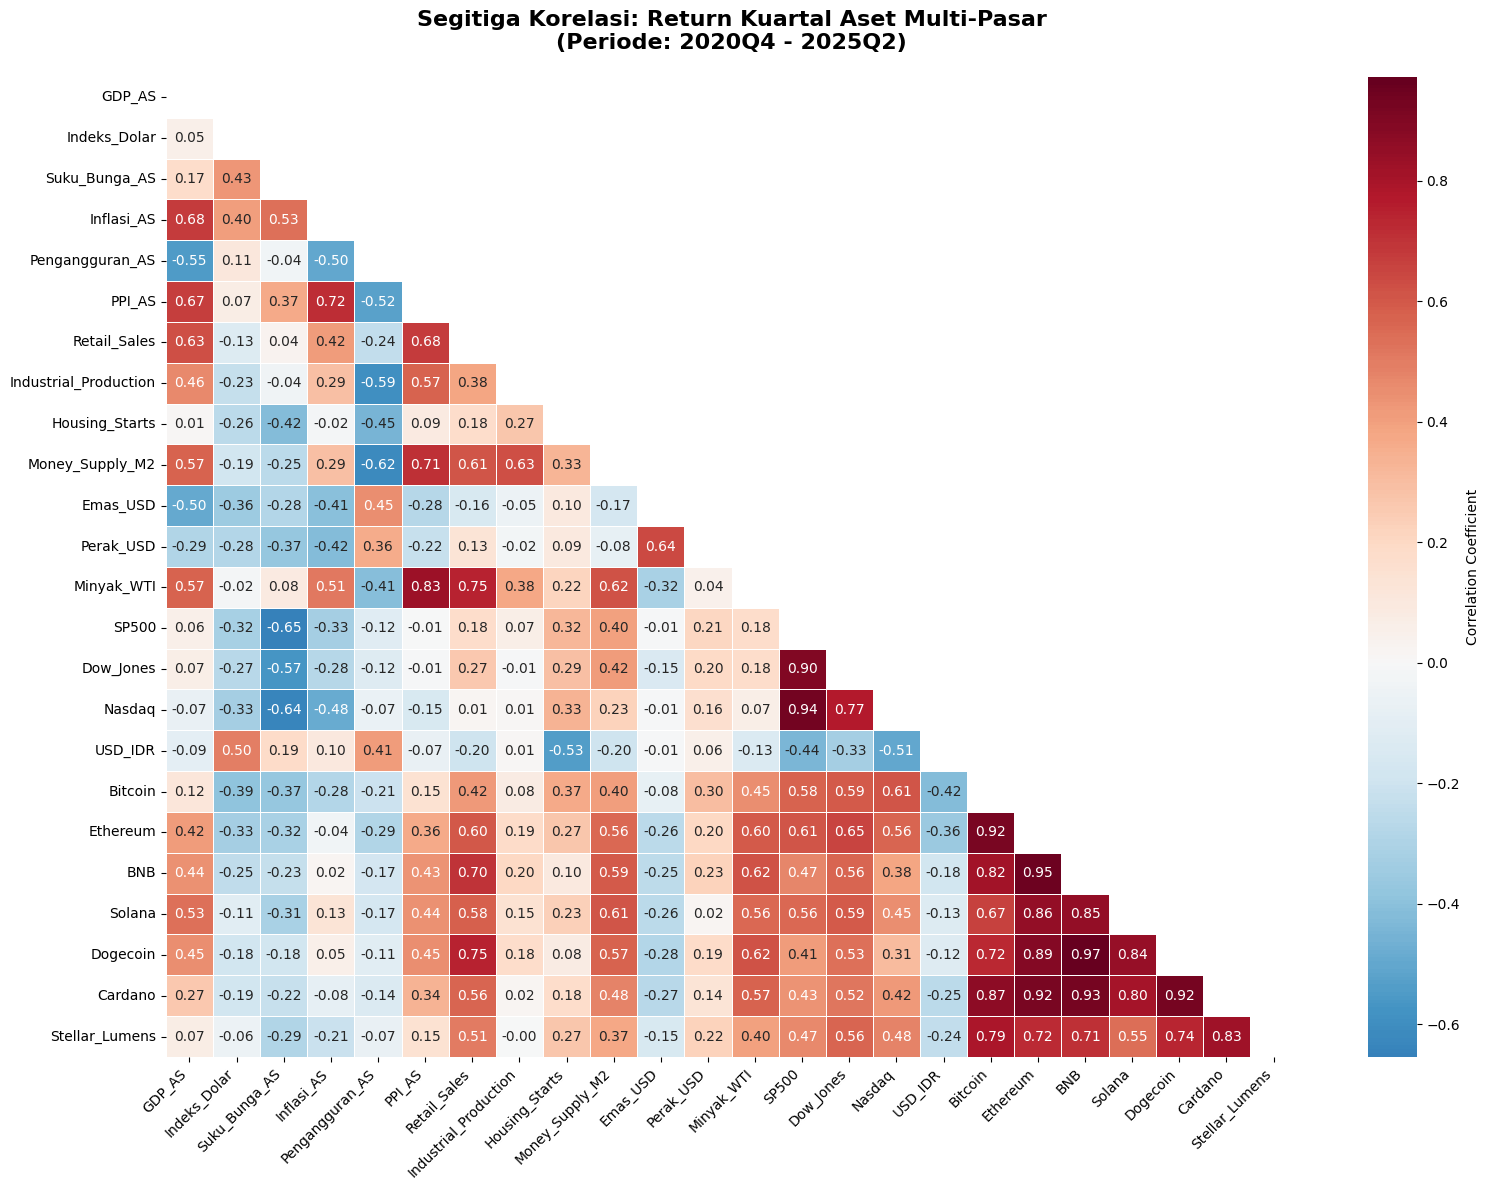

In [28]:
correlation_matrix = df_Q_change.corr()

print("=== CORRELATION MATRIX LENGKAP ===")
print(f"Shape: {correlation_matrix.shape}")
print("\nMatriks Korelasi:")
print(correlation_matrix.round(3))


plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Matriks Korelasi: Return Kuartal Aset Multi-Pasar\n(Periode: 2020Q4 - 2025Q2)',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix_quarterly.png')
plt.show()


print("=== CORRELATION MATRIX RETURN KUARTAL MASKED ===")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='RdBu_r',
            mask=mask,
            center=0,
            fmt='.2f',
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Segitiga Korelasi: Return Kuartal Aset Multi-Pasar\n(Periode: 2020Q4 - 2025Q2)',
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## TIME SERIES

Data shape: (2886, 15)
Columns: ['Indeks_Dolar', 'Emas_USD', 'Perak_USD', 'Minyak_WTI', 'SP500', 'Dow_Jones', 'Nasdaq', 'USD_IDR', 'Bitcoin', 'Ethereum', 'BNB', 'Solana', 'Dogecoin', 'Cardano', 'Stellar_Lumens']
Date range: 2018-01-01 00:00:00 to 2025-11-25 00:00:00


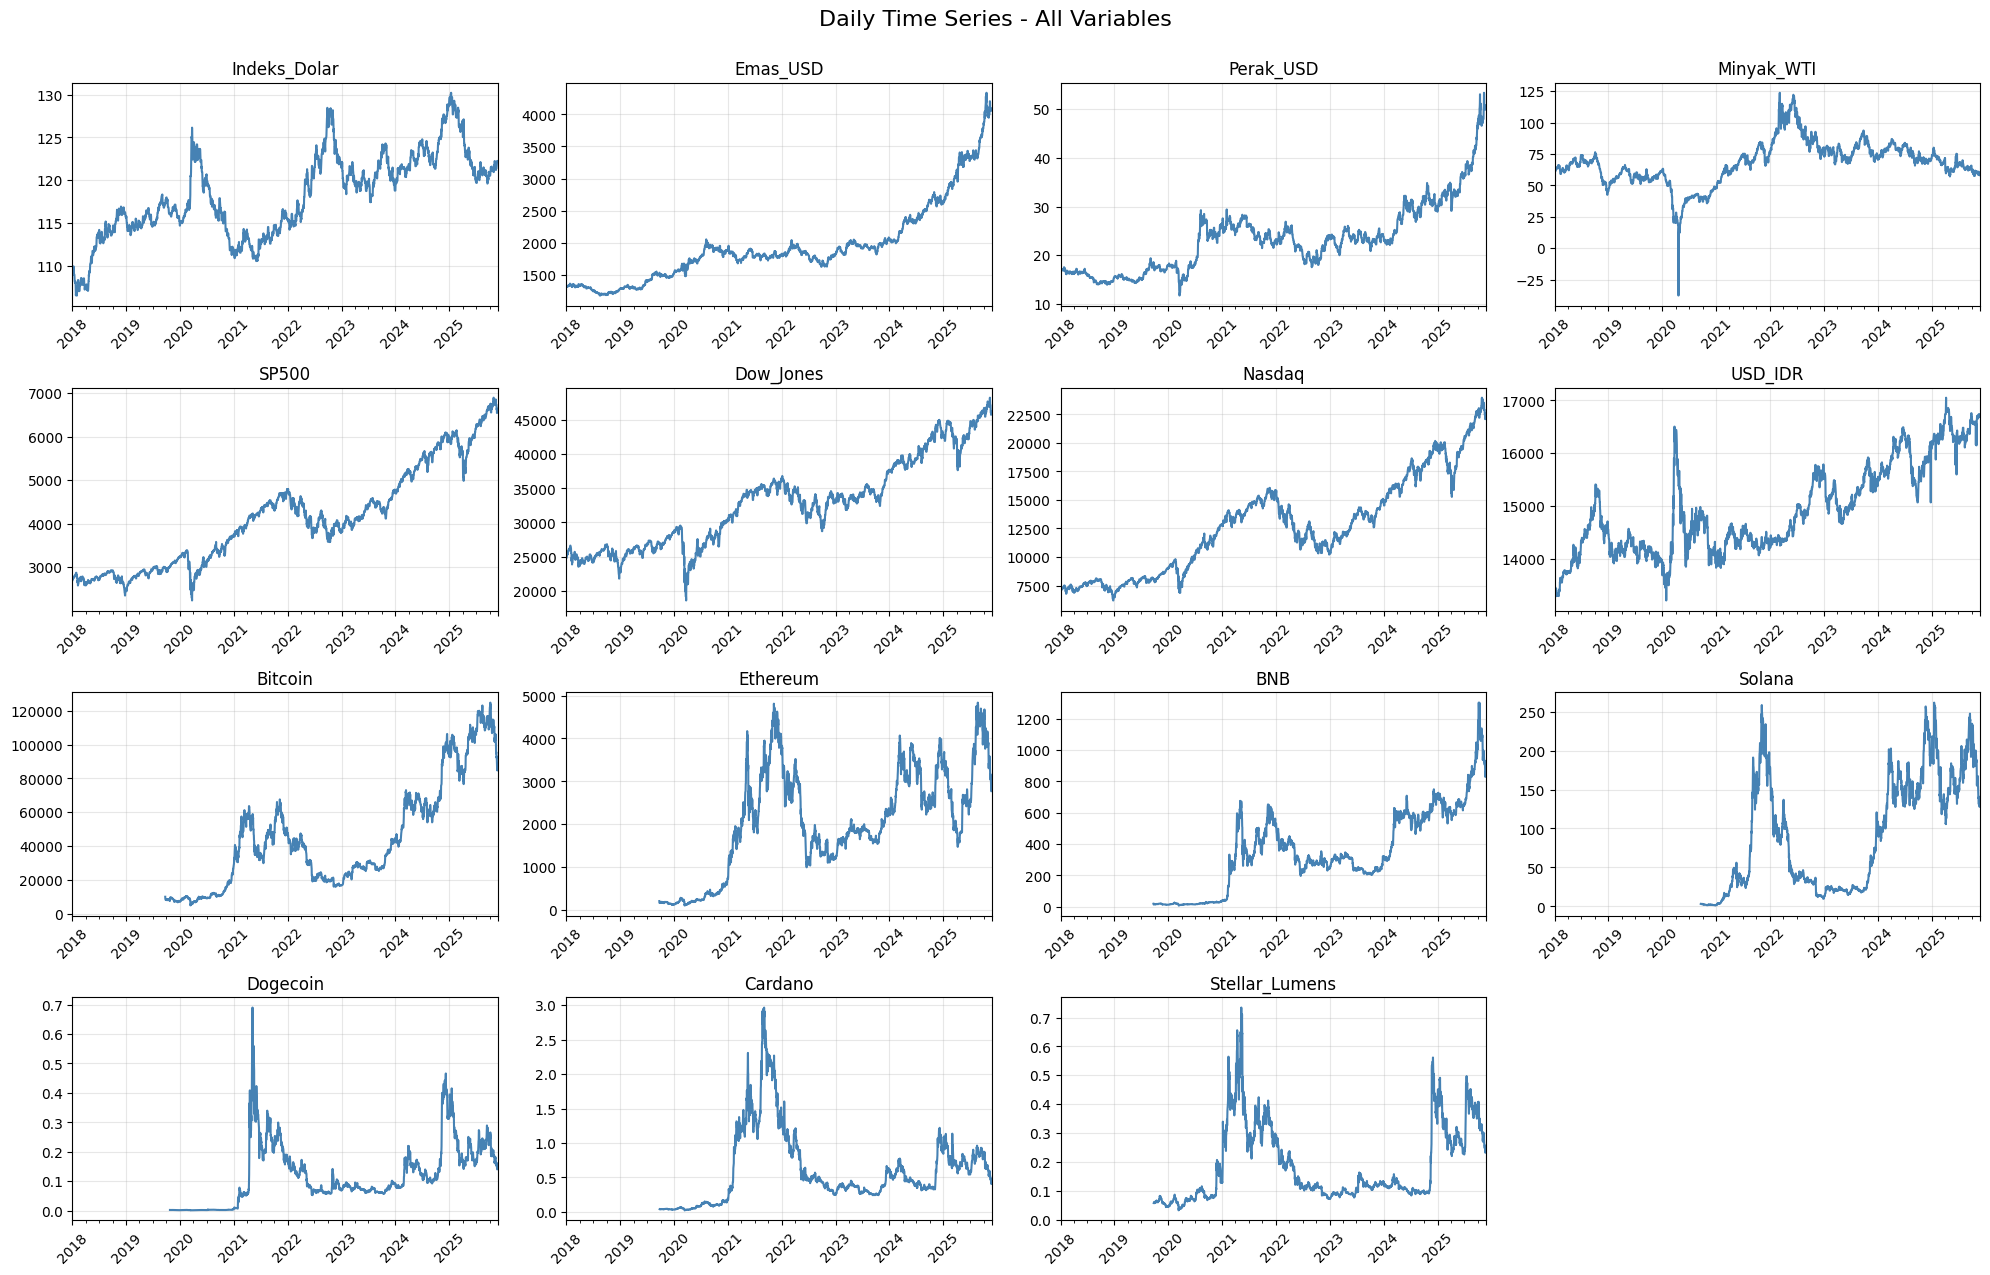

In [29]:
print(f"Data shape: {df_daily_merge.shape}")
print(f"Columns: {df_daily_merge.columns.tolist()}")
print(f"Date range: {df_daily_merge.index.min()} to {df_daily_merge.index.max()}")


fig, axes = plt.subplots(6, 4, figsize=(20, 18))
axes = axes.flatten()

for i, column in enumerate(df_daily_merge.columns):
    if i < len(axes):
        df_daily_merge[column].plot(ax=axes[i], title=column, color='steelblue')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Daily Time Series - All Variables', fontsize=16, y=1.02)
plt.savefig('daily_time_series.png')
plt.show()

Data shape: (95, 23)
Columns: ['Suku_Bunga_AS', 'Inflasi_AS', 'Pengangguran_AS', 'PPI_AS', 'Retail_Sales', 'Industrial_Production', 'Housing_Starts', 'Money_Supply_M2', 'Indeks_Dolar', 'Emas_USD', 'Perak_USD', 'Minyak_WTI', 'SP500', 'Dow_Jones', 'Nasdaq', 'USD_IDR', 'Bitcoin', 'Ethereum', 'BNB', 'Solana', 'Dogecoin', 'Cardano', 'Stellar_Lumens']
Date range: 2018-01 to 2025-11


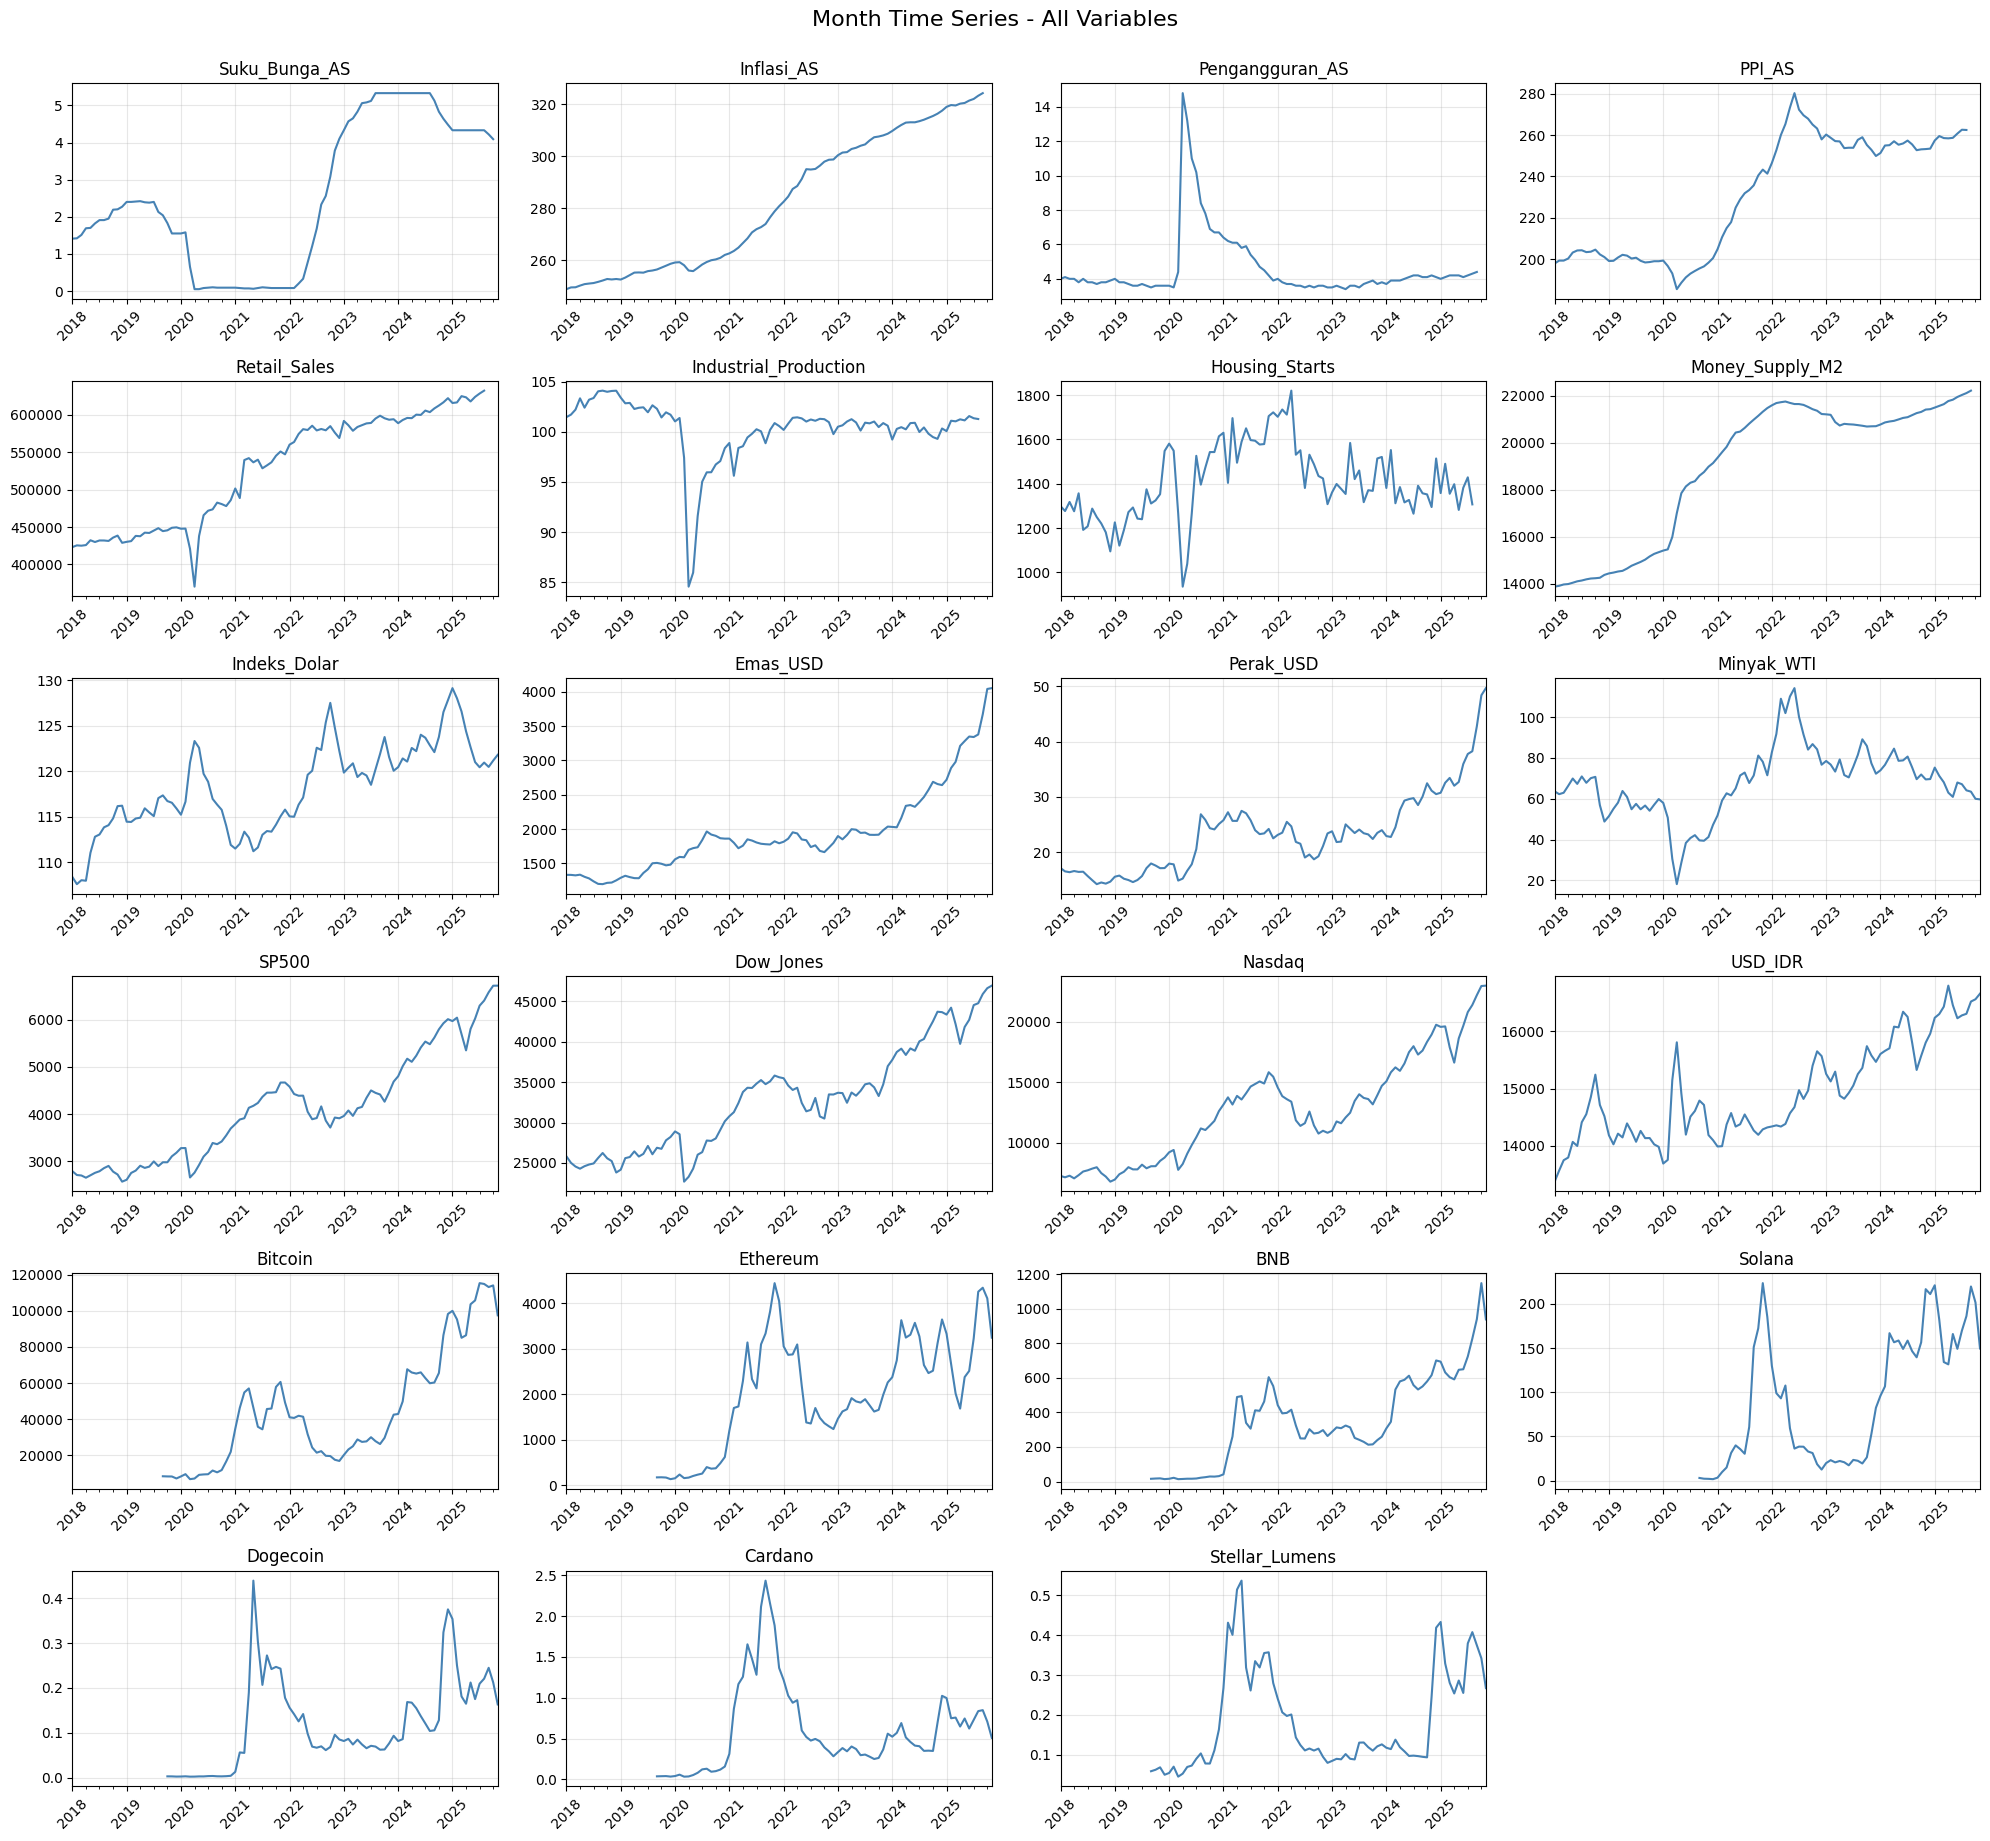

In [30]:
print(f"Data shape: {df_month_merge.shape}")
print(f"Columns: {df_month_merge.columns.tolist()}")
print(f"Date range: {df_month_merge.index.min()} to {df_month_merge.index.max()}")


fig, axes = plt.subplots(6, 4, figsize=(20, 18))
axes = axes.flatten()

for i, column in enumerate(df_month_merge.columns):
    if i < len(axes):
        df_month_merge[column].plot(ax=axes[i], title=column, color='steelblue')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Month Time Series - All Variables', fontsize=16, y=1.02)
plt.savefig('month_time_series.png')
plt.show()

Data shape: (32, 24)
Columns: ['GDP_AS', 'Indeks_Dolar', 'Suku_Bunga_AS', 'Inflasi_AS', 'Pengangguran_AS', 'PPI_AS', 'Retail_Sales', 'Industrial_Production', 'Housing_Starts', 'Money_Supply_M2', 'Emas_USD', 'Perak_USD', 'Minyak_WTI', 'SP500', 'Dow_Jones', 'Nasdaq', 'USD_IDR', 'Bitcoin', 'Ethereum', 'BNB', 'Solana', 'Dogecoin', 'Cardano', 'Stellar_Lumens']
Date range: 2018Q1 to 2025Q4


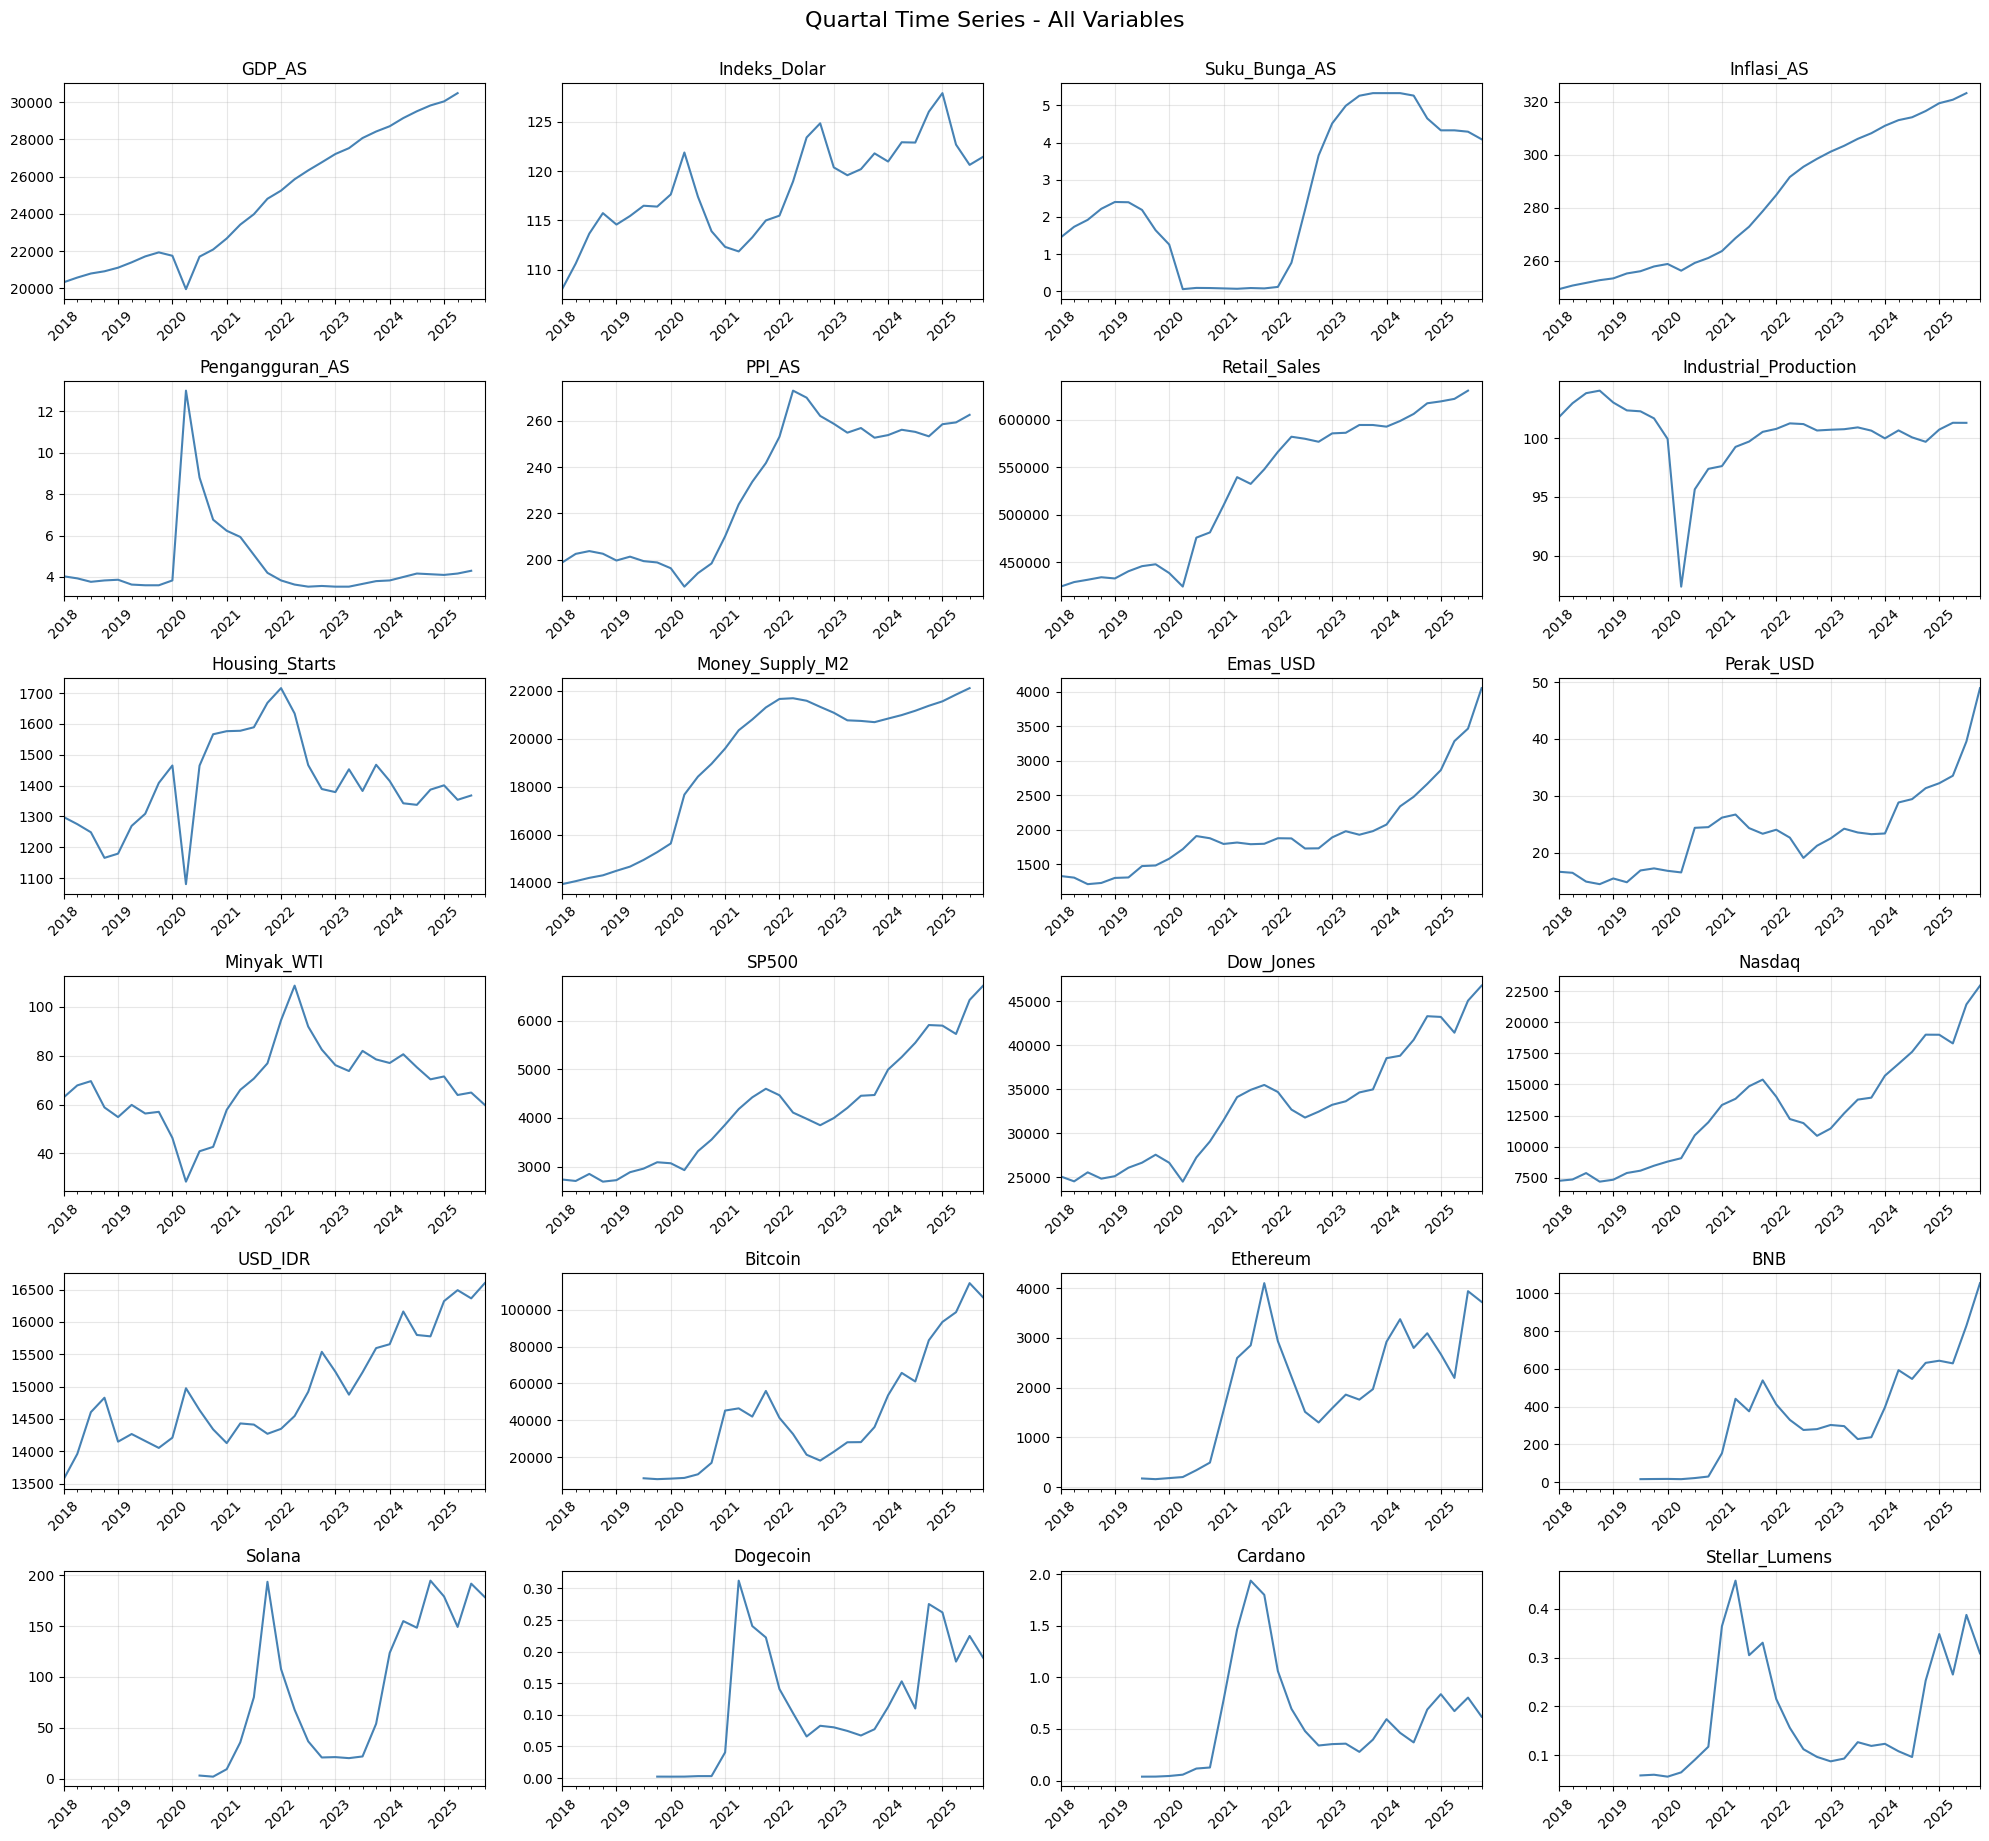

In [31]:
print(f"Data shape: {df_Q_merge.shape}")
print(f"Columns: {df_Q_merge.columns.tolist()}")
print(f"Date range: {df_Q_merge.index.min()} to {df_Q_merge.index.max()}")


fig, axes = plt.subplots(6, 4, figsize=(20, 18))
axes = axes.flatten()

for i, column in enumerate(df_Q_merge.columns):
    if i < len(axes):
        df_Q_merge[column].plot(ax=axes[i], title=column, color='steelblue')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)


for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Quartal Time Series - All Variables', fontsize=16, y=1.02)
plt.savefig('Q_time_series.png')
plt.show()

# PUBLISHING

In [32]:
df_daily_merge.to_csv('df_daily_raw.csv')
df_month_merge.to_csv('df_month_raw.csv')
df_Q_merge.to_csv('df_Q_raw.csv')

df_daily_clean.to_csv('df_daily_clean.csv')
df_month_clean.to_csv('df_month_clean.csv')
df_Q_clean.to_csv('df_Q_clean.csv')

In [33]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
os.makedirs('data/raw', exist_ok=True)

os.makedirs('data/clean', exist_ok=True)

In [35]:

source_dir = '.'

raw_dir = 'data/raw'
clean_dir = 'data/clean'

raw_csv_files = [
    'df_daily_raw.csv',
    'df_month_raw.csv',
    'df_Q_raw.csv'
]

clean_csv_files = [
    'df_daily_clean.csv',
    'df_month_clean.csv',
    'df_Q_clean.csv'
]

print(f"\nMemindahkan file dari '{source_dir}' ke '{raw_dir}' dan '{clean_dir}'...")

for file in raw_csv_files:
    src_path = os.path.join(source_dir, file)
    dest_path = os.path.join(raw_dir, file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        print(f"\nMemindahkan {file} ke {raw_dir}")
    else:
        print(f"File {src_path} tidak ditemukan di skip")

for file in clean_csv_files:
    src_path = os.path.join(source_dir, file)
    dest_path = os.path.join(clean_dir, file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        print(f"\nMemindahkan {file} ke {clean_dir}")
    else:
        print(f"File {src_path} tidak ditemukan di skip")

print("SEMUA CSV sdh berhasil dipindahkan")


Memindahkan file dari '.' ke 'data/raw' dan 'data/clean'...

Memindahkan df_daily_raw.csv ke data/raw

Memindahkan df_month_raw.csv ke data/raw

Memindahkan df_Q_raw.csv ke data/raw

Memindahkan df_daily_clean.csv ke data/clean

Memindahkan df_month_clean.csv ke data/clean

Memindahkan df_Q_clean.csv ke data/clean
SEMUA CSV sdh berhasil dipindahkan


In [36]:

os.makedirs('data/correlation_matrix', exist_ok=True)

os.makedirs('data/time_series', exist_ok=True)


In [37]:


source_dir = '.'

correlation_matrix_dir = 'data/correlation_matrix'
time_series_dir = 'data/time_series'

correlation_matrix_files = [
    'correlation_matrix_daily.png',
    'correlation_matrix_monthly.png',
    'correlation_matrix_quarterly.png'
]

time_series_files = [
    'daily_time_series.png',
    'month_time_series.png',
    'Q_time_series.png'
]

print(f"\nMemindahkan file dari '{source_dir}' ke '{correlation_matrix_dir}'...")

for file in correlation_matrix_files:
    src_path = os.path.join(source_dir, file)
    dest_path = os.path.join(correlation_matrix_dir, file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        print(f"\nMemindahkan {file} ke {correlation_matrix_dir}")
    else:
        print(f"File {src_path} tidak ditemukan di skip")

print(f"\nMemindahkan file dari ''{source_dir}' ke '{time_series_dir}'...")

for file in time_series_files:
    src_path = os.path.join(source_dir, file)
    dest_path = os.path.join(time_series_dir, file)
    if os.path.exists(src_path):
        shutil.move(src_path, dest_path)
        print(f"Memindahkan {file} ke {time_series_dir}")
    else:
        print(f"File {src_path} tidak ditemukan di skip")

print("Semua PNG berhasil dipindahkan")


Memindahkan file dari '.' ke 'data/correlation_matrix'...

Memindahkan correlation_matrix_daily.png ke data/correlation_matrix

Memindahkan correlation_matrix_monthly.png ke data/correlation_matrix

Memindahkan correlation_matrix_quarterly.png ke data/correlation_matrix

Memindahkan file dari ''.' ke 'data/time_series'...
Memindahkan daily_time_series.png ke data/time_series
Memindahkan month_time_series.png ke data/time_series
Memindahkan Q_time_series.png ke data/time_series
Semua PNG berhasil dipindahkan


In [38]:
shutil.make_archive('output', 'zip', 'data')

'/content/output.zip'